In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

import time

start_time = time.time()


def woodbury(A, U, V):
    A_inv = np.linalg.inv(A)
    C = np.fromfunction(lambda x,y: x==y, (V.shape[0],V.shape[0])) * 1
    return A_inv - np.dot(np.dot(A_inv.dot(U), np.linalg.inv(C + np.dot(V.dot(A_inv),U))),V.dot(A_inv))

[27.85782480239868, 27.630805015563965, 28.187646627426147, 27.66329789161682, 29.225971460342407, 29.28146004676819, 27.941009998321533, 28.838462829589844, 29.56752848625183]


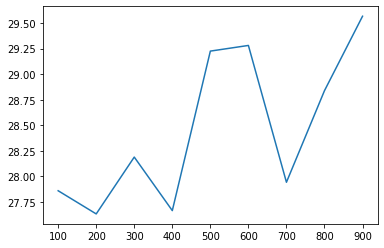

In [2]:
def get_times(p, k):
    p = 5000
    k = 10
    A = np.random.sample((p, p))
    U = np.random.sample((p, k))
    V = np.random.sample((k, p))
    start_time_w = time.time()
    woodbury(A, U, V)
    time_w = time.time() - start_time_w
    C = np.fromfunction(lambda x,y: x==y, (k,k)) * 1
    start_time = time.time()
    C = np.fromfunction(lambda x,y: x==y, (k,k)) * 1
    np.linalg.inv(A + np.dot(U, C).dot(V))
    time_ = time.time() - start_time_w
    return time_, time_w

time_w = []
time_ = []
p = [i for i in range(100, 1000, 100)]
for i in p:
    times = get_times(i, 100)
    time_.append(times[0])
    time_w.append(times[1])
print(time_)
plt.plot(p, time_)